# Math exam EDA

Main tasks:
   * look at the data
   * checks NaNs and outliers
   * replace NaNs and outliers
   * check correlation for numeric data
   * check statistics for nominative data
   * clear dataset from not sensible values



## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud_math = pd.read_csv('stud_math.csv')

In [2]:
""" To show info about nominative column """


def cat_column_info(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=col, data=stud_math, ax=axes[0])
    sns.boxplot(x='score', y=col, data=stud_math, orient='h')

    print(stud_math[[col]].info())
    print('NaNs/Not NaNs ratio = {}'.format(round(len(stud_math[col][stud_math[col].isna() == True]) /
                                                  len(stud_math[col]), 2)))

In [3]:
""" To show info about numeric column """


def num_column_info(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(x=col, data=stud_math, ax=axes[0])
    sns.boxplot(x='score', y=col, data=stud_math, orient='h')

    print(stud_math[[col]].info())
    print('NaNs/Not NaNs ratio = {}'.format(round(len(stud_math[col][stud_math[col].isna() == True]) /
                                                  len(stud_math[col]), 2)))

In [4]:
""" To replace nominative column NaNs with mode value """


def mode_replace_nan(col):

    stud_math[col].loc[(stud_math[col].isna() == True)
                       ] = stud_math[col].mode()[0]

In [5]:
""" To replace numeric column NaNs with mode value """


def median_replace_nan(col):

    stud_math[col].loc[(stud_math[col].isna() == True)
                       ] = stud_math[col].median()

In [100]:
""" To check statistic sensablity for nominative columns """


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Dataset initial research

In [6]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

* numeric columns - 12 float + 1 integer
* srting columns - 17

In [7]:
stud_math.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                          'Mjob': 'mjob', 'Fjob': 'fjob', 'studytime, granular': 'granular'}, inplace=True)
stud_math.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Columns

### Score

The main column for our model. NaNs to be deleted.

In [8]:
stud_math[['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [9]:
stud_math.dropna(subset=['score'], inplace=True)

### School

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  389 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.0


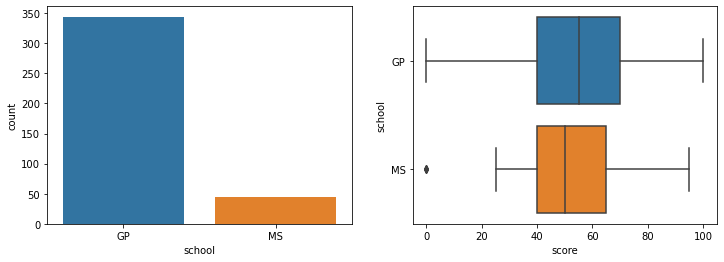

In [10]:
cat_column_info('school')

No NaNs, column could be linked with score value

### Sex

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     389 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.0


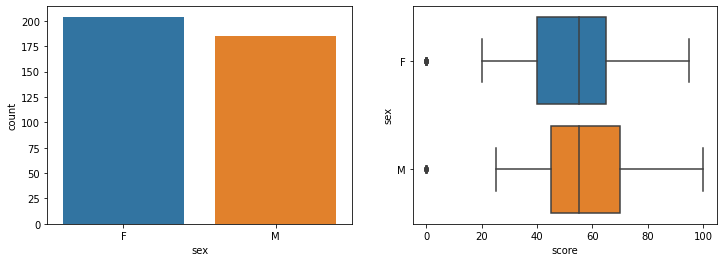

In [11]:
cat_column_info('sex')

No NaNs, column could be linked with score value

### Age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     389 non-null    int64
dtypes: int64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.0


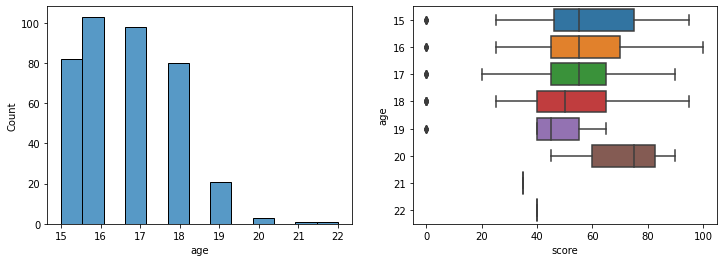

In [12]:
num_column_info('age')

No NaNs, column could be linked with score value

### Address

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.04


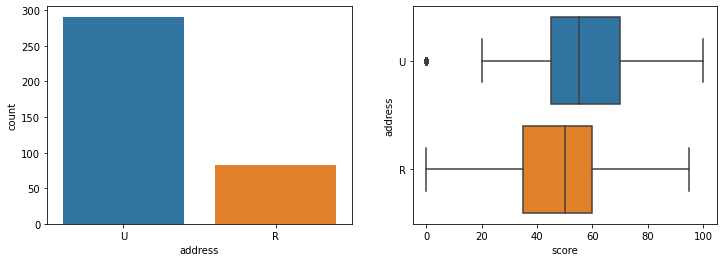

In [13]:
cat_column_info('address')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [14]:
mode_replace_nan('address')

### Famsize

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  362 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.07


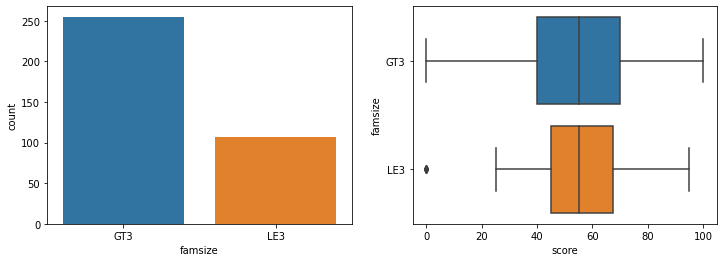

In [15]:
cat_column_info('famsize')

NaNs less than 10% -> to be replaced with mode value, looks like column make no sence to score

In [16]:
mode_replace_nan('famsize')

### Pstatus

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  344 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.12


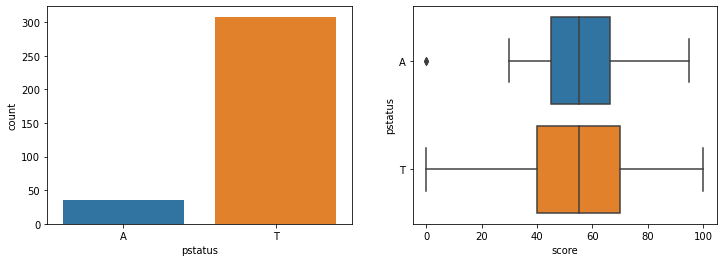

In [17]:
cat_column_info('pstatus')

NaNs more than 10% -> try to repaire, looks like column make no sence to score

In [18]:
stud_math[['pstatus', 'age', 'famsize', 'medu', 'fedu', 'mjob',
           'fjob', 'famrel']]

,pstatus,age,famsize,medu,fedu,mjob,fjob,famrel
0,A,18,GT3,4.0,4.0,at_home,teacher,4.0
1,NaN,17,GT3,1.0,1.0,at_home,other,5.0
2,T,15,LE3,1.0,1.0,at_home,other,4.0
3,T,15,GT3,4.0,2.0,health,NaN,3.0
4,T,16,GT3,3.0,3.0,other,other,4.0
...,...,...,...,...,...,...,...,...
390,A,20,LE3,2.0,2.0,services,services,5.0
391,T,17,LE3,3.0,1.0,services,services,2.0
392,T,21,GT3,1.0,1.0,other,other,5.0
393,T,18,LE3,3.0,2.0,services,other,4.0


In [19]:
stud_math.groupby('age').pstatus.value_counts()

age  pstatus
15   T          63
     A          10
16   T          81
     A           8
17   T          81
     A           9
18   T          65
     A           5
19   T          15
     A           2
20   A           2
     T           1
21   T           1
22   T           1
Name: pstatus, dtype: int64

In [20]:
stud_math.groupby('famsize').pstatus.value_counts()

famsize  pstatus
GT3      T          227
         A           23
LE3      T           81
         A           13
Name: pstatus, dtype: int64

In [21]:
stud_math[['pstatus', 'age', 'famsize', 'medu', 'fedu', 'mjob',
           'fjob', 'famrel']].loc[stud_math.pstatus == 'A']

,pstatus,age,famsize,medu,fedu,mjob,fjob,famrel
0,A,18,GT3,4.0,4.0,at_home,teacher,4.0
7,A,17,GT3,4.0,4.0,other,teacher,4.0
8,A,15,LE3,3.0,2.0,services,other,NaN
14,A,15,GT3,2.0,2.0,other,other,4.0
37,A,16,GT3,4.0,4.0,other,teacher,2.0
45,A,15,LE3,4.0,3.0,other,other,5.0
46,A,16,LE3,3.0,NaN,other,services,2.0
52,A,15,LE3,4.0,2.0,health,NaN,5.0
55,A,16,GT3,2.0,1.0,other,other,5.0
56,A,15,GT3,4.0,3.0,services,services,4.0


No clear reasons to fill NaNs with any predicted value. Will be filled with mode value.

In [22]:
mode_replace_nan('pstatus')

### Medu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    386 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.01


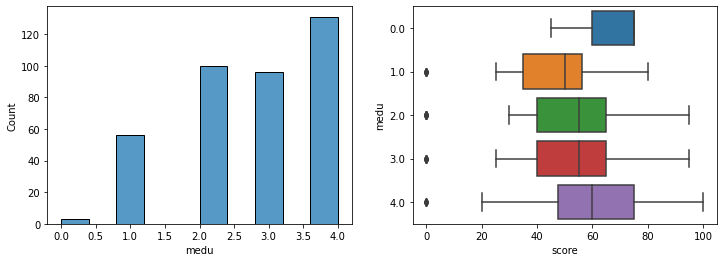

In [23]:
num_column_info('medu')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [24]:
median_replace_nan('medu')

### Fedu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    365 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.06


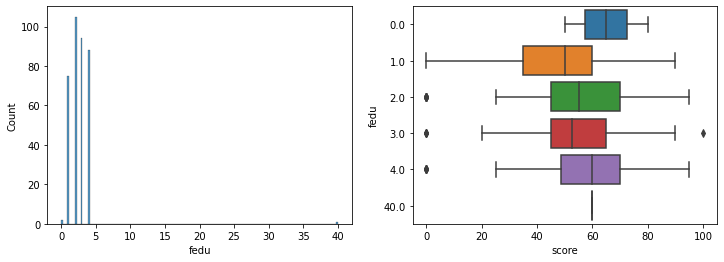

In [25]:
num_column_info('fedu')

NaNs less than 10% -> may be replaced with mode value, but we can recover NaNs with fjob column;
One value (40) is out of range, looks like mistake 40 instead of 4 -> replace it;
column could be linked with score value.

In [26]:
stud_math.fedu.loc[stud_math.fedu == 40] = 4

In [27]:
# to take median fedu value for each fjob
stud_math.groupby('fjob').fedu.median()

fjob
at_home     2.0
health      4.0
other       2.0
services    3.0
teacher     4.0
Name: fedu, dtype: float64

In [28]:
stud_math.fedu.loc[(stud_math.fedu.isna() == True) &
                   (stud_math.fjob == 'at_home')] = 2

stud_math.fedu.loc[(stud_math.fedu.isna() == True) &
                   (stud_math.fjob == 'health')] = 4

stud_math.fedu.loc[(stud_math.fedu.isna() == True) &
                   (stud_math.fjob == 'other')] = 2

stud_math.fedu.loc[(stud_math.fedu.isna() == True) &
                   (stud_math.fjob == 'services')] = 2

stud_math.fedu.loc[(stud_math.fedu.isna() == True) &
                   (stud_math.fjob == 'teacher')] = 4

In [29]:
# last two NaNs will be changed with median value for column
stud_math.fedu.loc[(stud_math.fedu.isna() == True)]

161   NaN
374   NaN
Name: fedu, dtype: float64

In [30]:
median_replace_nan('fedu')

### Mjob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    370 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.05


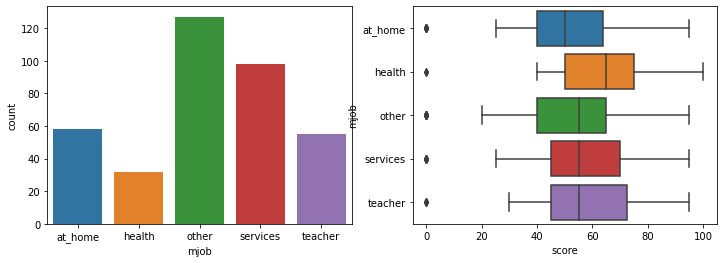

In [31]:
cat_column_info('mjob')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [32]:
mode_replace_nan('mjob')

### Fjob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    353 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.09


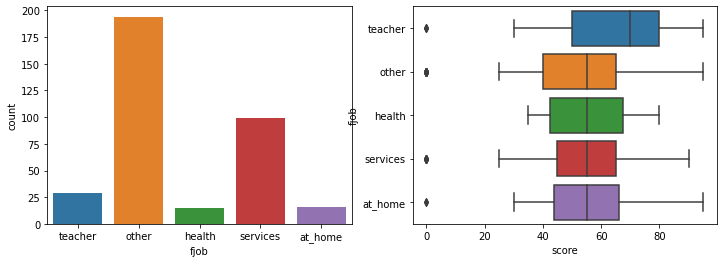

In [33]:
cat_column_info('fjob')

NaNs less than 10% -> may be replaced with mode value, but we can recover NaNs with fedu column;
column could be linked with score value.

In [34]:
# to take mode fjob value for each fedu
stud_math.groupby('fedu').fjob.value_counts()

fedu  fjob    
0.0   other        2
1.0   other       46
      services    18
      at_home      3
      health       1
2.0   other       65
      services    34
      at_home      8
      health       1
3.0   other       50
      services    30
      at_home      3
      health       3
      teacher      1
4.0   other       31
      teacher     28
      services    17
      health      10
      at_home      2
Name: fjob, dtype: int64

Looks like it make no sense cause anyway we've got one mode value for all.

In [35]:
mode_replace_nan('fjob')

### Reason

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  372 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.04


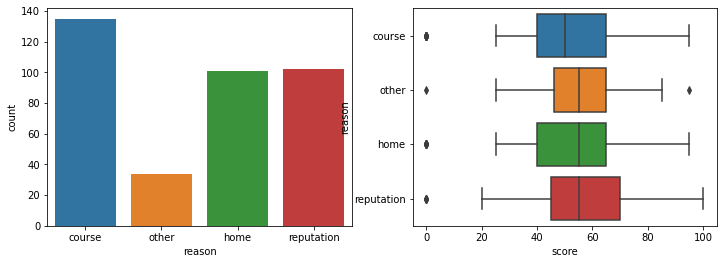

In [36]:
cat_column_info('reason')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [37]:
mode_replace_nan('reason')

### Guardian

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  358 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.08


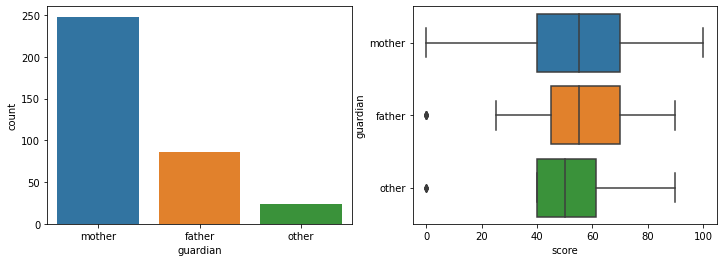

In [38]:
cat_column_info('guardian')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [39]:
mode_replace_nan('reason')

### Traveltime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  361 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.07


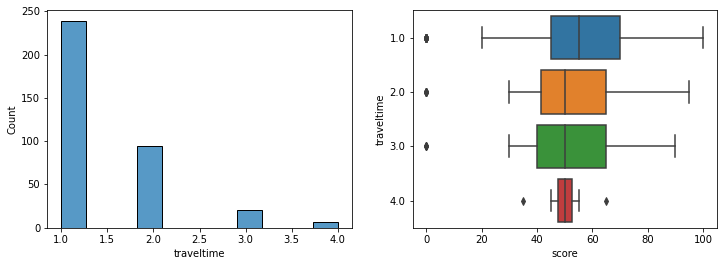

In [40]:
num_column_info('traveltime')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [41]:
median_replace_nan('traveltime')

### Studytime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  382 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.02


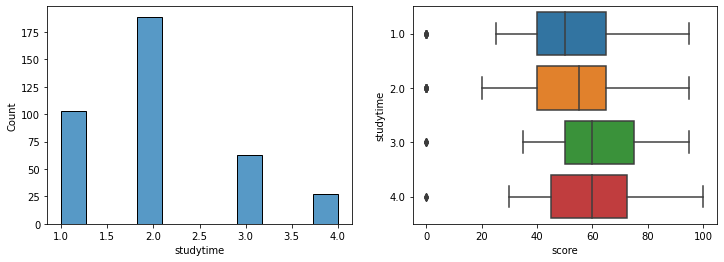

In [42]:
num_column_info('studytime')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [43]:
median_replace_nan('studytime')

### Failures

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  367 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.06


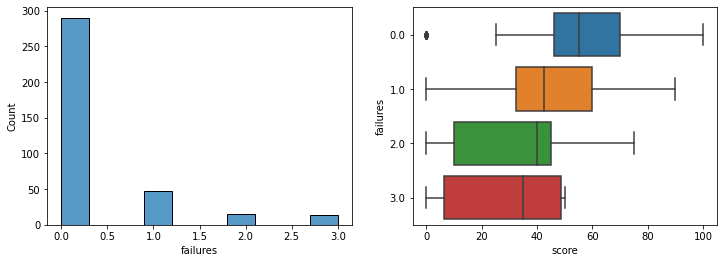

In [44]:
num_column_info('failures')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [45]:
median_replace_nan('failures')

### Schoolsup

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  380 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.02


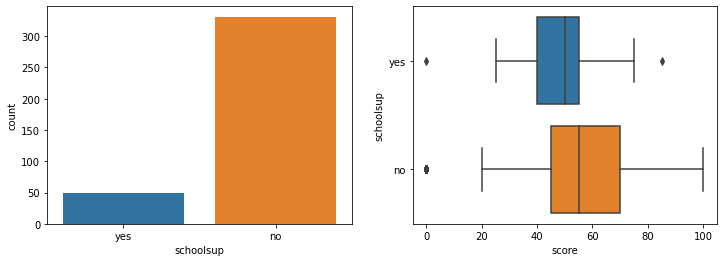

In [46]:
cat_column_info('schoolsup')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [47]:
mode_replace_nan('schoolsup')

### Famsup

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  351 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.1


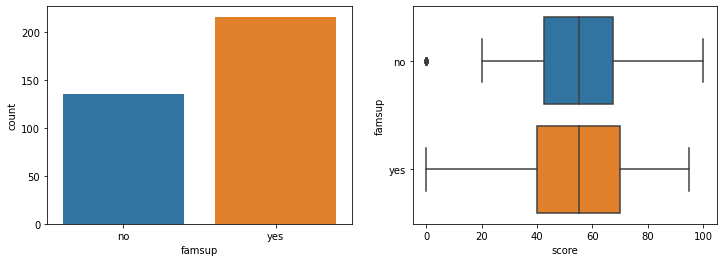

In [48]:
cat_column_info('famsup')

NaNs equal 10%, but it looks (medians are the same and most values for yes and no are close) column make no actual sense on score value. Change NaNs to mode.

In [49]:
mode_replace_nan('famsup')

### Paid 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    350 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.1


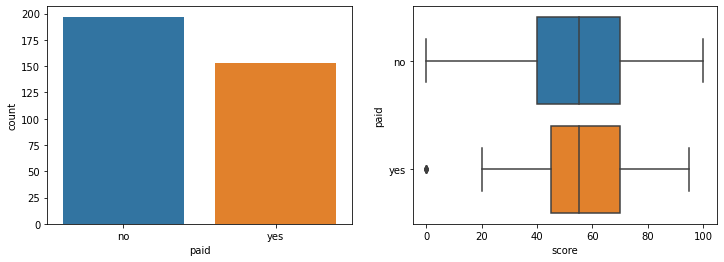

In [50]:
cat_column_info('paid')

NaNs equal 10% -> try to replace them with sensible values, looks like column make no sence to score

In [51]:
stud_math[['paid', 'mjob', 'fjob']]

,paid,mjob,fjob
0,no,at_home,teacher
1,no,at_home,other
2,NaN,at_home,other
3,yes,health,other
4,yes,other,other
...,...,...,...
390,yes,services,services
391,no,services,services
392,no,other,other
393,no,services,other


In [52]:
stud_math.groupby('mjob').paid.value_counts()

mjob      paid
at_home   no      34
          yes     17
health    yes     14
          no      13
other     no      83
          yes     52
services  no      50
          yes     41
teacher   yes     29
          no      17
Name: paid, dtype: int64

In [53]:
stud_math.groupby('fjob').paid.value_counts()

fjob      paid
at_home   no       10
          yes       5
health    yes       8
          no        5
other     no      115
          yes      90
services  no       49
          yes      41
teacher   no       18
          yes       9
Name: paid, dtype: int64

Looks like if mjob is 'health' or 'teacher' or fjob is 'health' than paid is 'yes', else - 'no'

In [54]:
stud_math.paid.loc[(stud_math.paid.isna() == True) & ((stud_math.mjob == 'health') | (
    stud_math.mjob == 'teacher') | (stud_math.fjob == 'health'))] = 'yes'

In [55]:
stud_math.paid.loc[(stud_math.paid.isna() == True)] = 'no'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    389 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.0


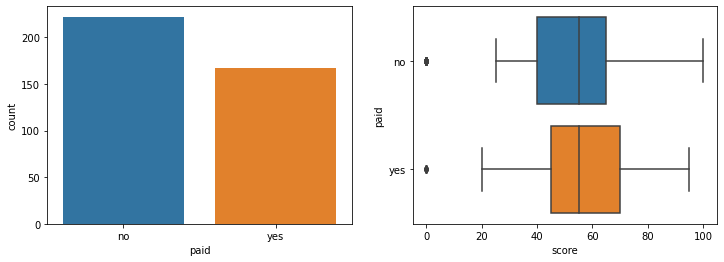

In [56]:
cat_column_info('paid')

### Activities

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  375 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.04


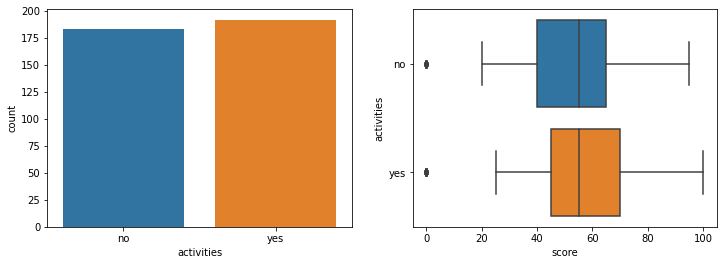

In [57]:
cat_column_info('activities')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [58]:
mode_replace_nan('activities')

### Nursery 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  374 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.04


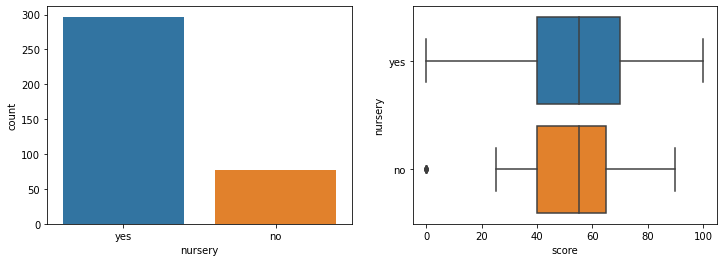

In [59]:
cat_column_info('nursery')

NaNs less than 10% -> to be replaced with mode value, looks like column make no sence to score

In [60]:
mode_replace_nan('nursery')

### Higher

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  369 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.05


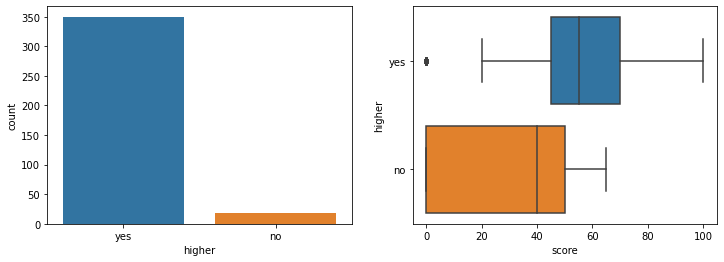

In [61]:
cat_column_info('higher')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [62]:
mode_replace_nan('higher')

### Internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  355 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.09


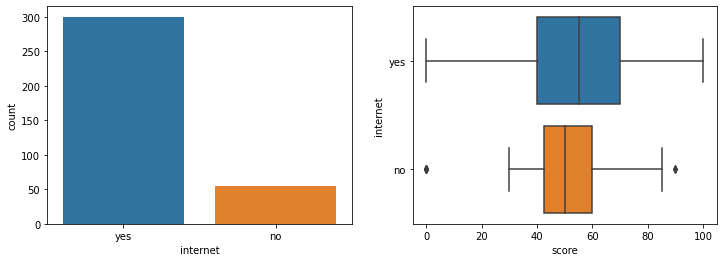

In [63]:
cat_column_info('internet')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [64]:
mode_replace_nan('internet')

### Romantic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  358 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB
None
NaNs/Not NaNs ratio = 0.08


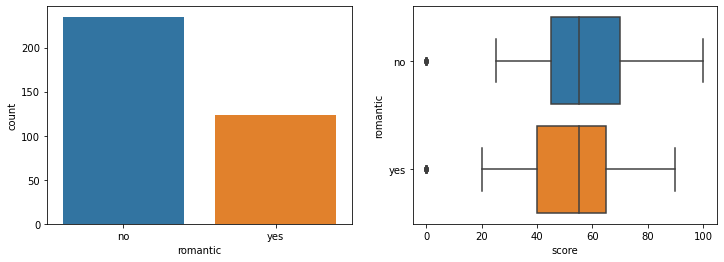

In [65]:
cat_column_info('romantic')

NaNs less than 10% -> to be replaced with mode value, column could be linked with score value

In [66]:
mode_replace_nan('romantic')

### Famrel

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  362 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.07


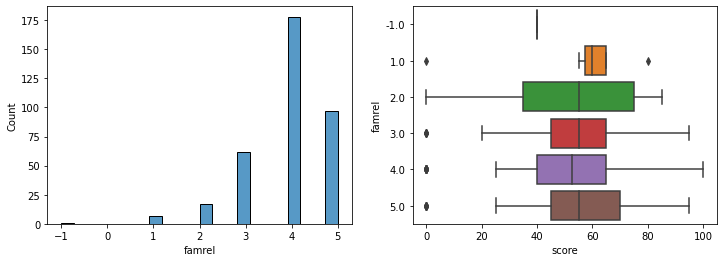

In [67]:
num_column_info('famrel')

NaNs less than 10% -> to be replaced with median value;

one value (-1) is out of range, looks like mistake (or sad joke) -> change it to '1';

column could be linked with score value

In [68]:
stud_math.loc[stud_math.famrel == -1]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [69]:
stud_math.famrel.loc[stud_math.famrel == -1] = 1

In [70]:
median_replace_nan('famrel')

### Freetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  380 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.02


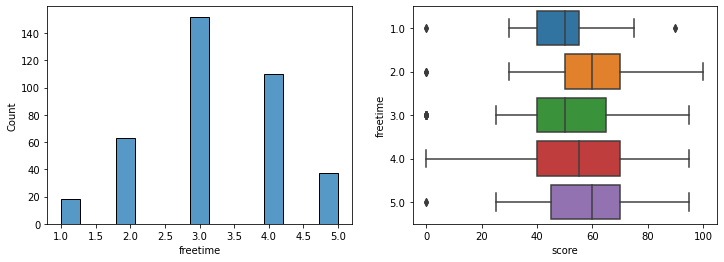

In [71]:
num_column_info('freetime')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [72]:
median_replace_nan('freetime')

### Goout

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   382 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.02


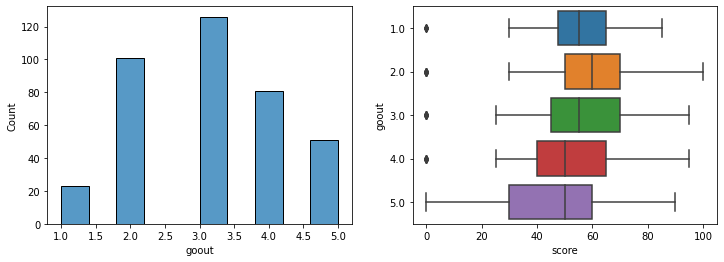

In [73]:
num_column_info('goout')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [74]:
median_replace_nan('goout')

### Health

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  374 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.04


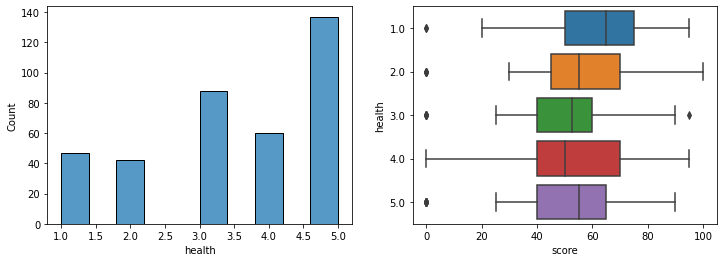

In [75]:
num_column_info('health')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [76]:
median_replace_nan('health')

### Absences

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  378 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.03


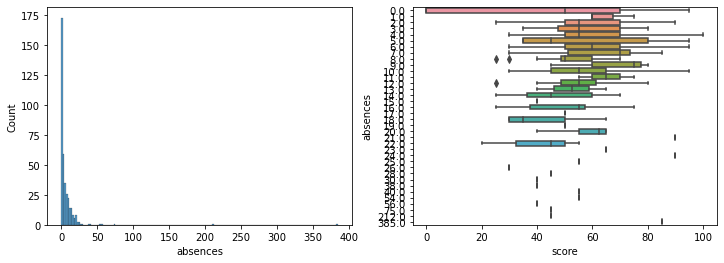

In [77]:
num_column_info('absences')

NaNs less than 10% -> to be replaced with median value;

we've got several strange values -> to be checked and if not valid - replaced with median;

column could be linked with score value

In [78]:
median_replace_nan('absences')

In [79]:
stud_math.absences.value_counts()

0.0      110
4.0       63
2.0       60
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [80]:
# 212 and 385 absences looks unreal -> replace it with median
stud_math.absences.loc[(stud_math.absences == 212) | (
    stud_math.absences == 385)] = stud_math.absences.median()

Absences to be devided in 3 parts -> less than 10, form 10 to 30 and more than 30

In [81]:
stud_math.absences = stud_math.absences.apply(
    lambda x: 1 if x <= 10 else 2 if x > 10 and x <= 30 else 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   absences  389 non-null    int64
dtypes: int64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.0


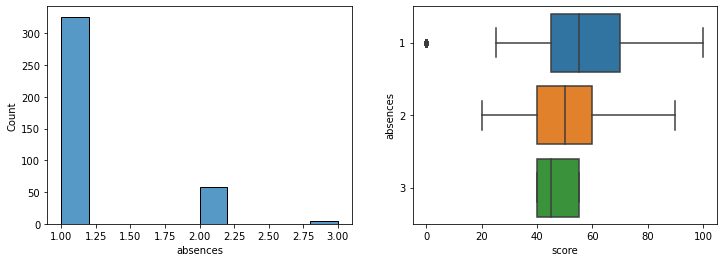

In [82]:
num_column_info('absences')

### Granular

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   granular  382 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB
None
NaNs/Not NaNs ratio = 0.02


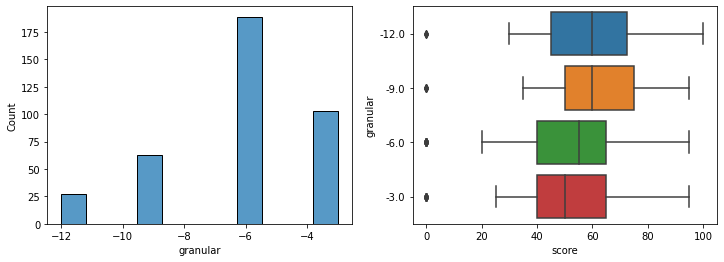

In [83]:
num_column_info('granular')

NaNs less than 10% -> to be replaced with median value, column could be linked with score value

In [84]:
median_replace_nan('granular')

## Correlation

<AxesSubplot:>

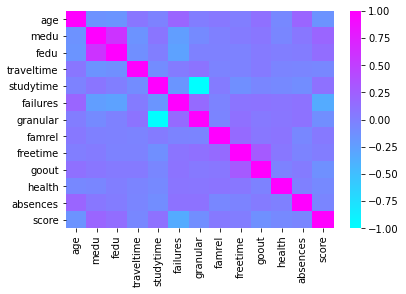

In [91]:
sns.heatmap(stud_math.corr(), cmap='cool')

1) Medu strongly correlated with fedu (will drop fedu)
2) Granular strongly (inverted) correlated with studytime (will drop granular).

In [95]:
stud_math.drop(['granular'], inplace = True, axis = 1)
stud_math.drop(['fedu'], inplace = True, axis = 1)

## Statistics for nominative values

In [101]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


So columns address, mjob, higher, romantic make real affect on score value. Let's leave them and delete other nominative columns.

In [102]:
for col in ['school', 'sex', 'famsize', 'pstatus',
            'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'internet']:
    stud_math.drop(col, inplace = True, axis = 1)

## Conclusions

* In most cases NaNs qnt less than 10% (12% max), all NaNs was replaced with median or mode values.
* Outliers found in fedu, famrel and absences columns, they was replaced with sence and median values. Actually dataset is quite good and clear.
* Positive correlation between medu and fedu could be result of romantic relations started in colledge or university)
* Most sensible values are in listed below table.

In [104]:
stud_math.head()

,age,address,medu,mjob,traveltime,studytime,failures,higher,romantic,famrel,freetime,goout,health,absences,score
0,18,U,4.0,at_home,2.0,2.0,0.0,yes,no,4.0,3.0,4.0,3.0,1,30.0
1,17,U,1.0,at_home,1.0,2.0,0.0,yes,no,5.0,3.0,3.0,3.0,1,30.0
2,15,U,1.0,at_home,1.0,2.0,3.0,yes,no,4.0,3.0,2.0,3.0,1,50.0
3,15,U,4.0,health,1.0,3.0,0.0,yes,yes,3.0,2.0,2.0,5.0,1,75.0
4,16,U,3.0,other,1.0,2.0,0.0,yes,no,4.0,3.0,2.0,5.0,1,50.0
